In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d giovamata/airlinedelaycauses
!unzip airlinedelaycauses.zip
!ls

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses
License(s): unknown
 83% 55.0M/66.6M [00:00<00:00, 157MB/s]
100% 66.6M/66.6M [00:00<00:00, 128MB/s]
Archive:  airlinedelaycauses.zip
  inflating: DelayedFlights.csv      
  inflating: st99_d00.dbf            
  inflating: st99_d00.shp            
  inflating: st99_d00.shx            
airlinedelaycauses.zip	kaggle.json  st99_d00.dbf  st99_d00.shx
DelayedFlights.csv	sample_data  st99_d00.shp


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('DelayedFlights.csv')

In [ ]:
from IPython.display import display

data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [ ]:
data1 = data.dropna(axis=0, how='any', inplace=False)
data1.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
data1['TailNum'] = encoder.fit_transform(data1['TailNum'])
tailname = {index : label for index, label in enumerate(encoder.classes_)}
tailname

<ipython-input-17-db11178f7cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TailNum'] = encoder.fit_transform(data1['TailNum'])


{0: '80009E',
 1: '80019E',
 2: '80059E',
 3: '80129E',
 4: '80139E',
 5: '80199E',
 6: '80209E',
 7: '80219E',
 8: '80239E',
 9: '80249E',
 10: '80259E',
 11: '80269E',
 12: '80279E',
 13: '80299E',
 14: '80309E',
 15: '80319E',
 16: '80329E',
 17: '80339E',
 18: '80349E',
 19: '80359E',
 20: '80369E',
 21: '80399E',
 22: '80409E',
 23: '80419E',
 24: '83909E',
 25: '84099E',
 26: '84129E',
 27: '84169E',
 28: '84239E',
 29: '84329E',
 30: '84449E',
 31: '84589E',
 32: '84759E',
 33: '84779E',
 34: '84889E',
 35: '84929E',
 36: '84959E',
 37: '85019E',
 38: '85059E',
 39: '85069E',
 40: '85159E',
 41: '85169E',
 42: '85249E',
 43: '85259E',
 44: '85329E',
 45: '85339E',
 46: '85419E',
 47: '85439E',
 48: '85549E',
 49: '85609E',
 50: '85779E',
 51: '85809E',
 52: '85879E',
 53: '85889E',
 54: '85989E',
 55: '86049E',
 56: '86119E',
 57: '86239E',
 58: '86319E',
 59: '86469E',
 60: '86599E',
 61: '86659E',
 62: '86729E',
 63: '86739E',
 64: '86749E',
 65: '86839E',
 66: '86889E',
 67: 

In [ ]:
data1['UniqueCarrier'] = encoder.fit_transform(data1['UniqueCarrier'])
carrier = {index : label for index, label in enumerate(encoder.classes_)}
carrier

<ipython-input-18-a5f77356be3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['UniqueCarrier'] = encoder.fit_transform(data1['UniqueCarrier'])


{0: '9E',
 1: 'AA',
 2: 'AQ',
 3: 'AS',
 4: 'B6',
 5: 'CO',
 6: 'DL',
 7: 'EV',
 8: 'F9',
 9: 'FL',
 10: 'HA',
 11: 'MQ',
 12: 'NW',
 13: 'OH',
 14: 'OO',
 15: 'UA',
 16: 'US',
 17: 'WN',
 18: 'XE',
 19: 'YV'}

In [ ]:
data1['Origin'] = encoder.fit_transform(data1['Origin'])
origin = {index : label for index, label in enumerate(encoder.classes_)}
origin

<ipython-input-19-95e8602305c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Origin'] = encoder.fit_transform(data1['Origin'])


{0: 'ABE',
 1: 'ABI',
 2: 'ABQ',
 3: 'ABY',
 4: 'ACK',
 5: 'ACT',
 6: 'ACV',
 7: 'ACY',
 8: 'ADK',
 9: 'ADQ',
 10: 'AEX',
 11: 'AGS',
 12: 'AKN',
 13: 'ALB',
 14: 'ALO',
 15: 'AMA',
 16: 'ANC',
 17: 'ASE',
 18: 'ATL',
 19: 'ATW',
 20: 'AUS',
 21: 'AVL',
 22: 'AVP',
 23: 'AZO',
 24: 'BDL',
 25: 'BET',
 26: 'BFL',
 27: 'BGM',
 28: 'BGR',
 29: 'BHM',
 30: 'BIL',
 31: 'BIS',
 32: 'BJI',
 33: 'BLI',
 34: 'BMI',
 35: 'BNA',
 36: 'BOI',
 37: 'BOS',
 38: 'BPT',
 39: 'BQK',
 40: 'BQN',
 41: 'BRO',
 42: 'BRW',
 43: 'BTM',
 44: 'BTR',
 45: 'BTV',
 46: 'BUF',
 47: 'BUR',
 48: 'BWI',
 49: 'BZN',
 50: 'CAE',
 51: 'CAK',
 52: 'CDC',
 53: 'CDV',
 54: 'CEC',
 55: 'CHA',
 56: 'CHO',
 57: 'CHS',
 58: 'CIC',
 59: 'CID',
 60: 'CLD',
 61: 'CLE',
 62: 'CLL',
 63: 'CLT',
 64: 'CMH',
 65: 'CMI',
 66: 'CMX',
 67: 'COD',
 68: 'COS',
 69: 'CPR',
 70: 'CRP',
 71: 'CRW',
 72: 'CSG',
 73: 'CVG',
 74: 'CWA',
 75: 'DAB',
 76: 'DAL',
 77: 'DAY',
 78: 'DBQ',
 79: 'DCA',
 80: 'DEN',
 81: 'DFW',
 82: 'DHN',
 83: 'DLG',
 8

In [ ]:
data1['Dest'] = encoder.fit_transform(data1['Dest'])
dest = {index : label for index, label in enumerate(encoder.classes_)}
dest

<ipython-input-20-61e0b43280bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Dest'] = encoder.fit_transform(data1['Dest'])


{0: 'ABE',
 1: 'ABI',
 2: 'ABQ',
 3: 'ABY',
 4: 'ACK',
 5: 'ACT',
 6: 'ACV',
 7: 'ACY',
 8: 'ADK',
 9: 'ADQ',
 10: 'AEX',
 11: 'AGS',
 12: 'AKN',
 13: 'ALB',
 14: 'ALO',
 15: 'AMA',
 16: 'ANC',
 17: 'ASE',
 18: 'ATL',
 19: 'ATW',
 20: 'AUS',
 21: 'AVL',
 22: 'AVP',
 23: 'AZO',
 24: 'BDL',
 25: 'BET',
 26: 'BFL',
 27: 'BGM',
 28: 'BGR',
 29: 'BHM',
 30: 'BIL',
 31: 'BIS',
 32: 'BJI',
 33: 'BLI',
 34: 'BMI',
 35: 'BNA',
 36: 'BOI',
 37: 'BOS',
 38: 'BPT',
 39: 'BQK',
 40: 'BQN',
 41: 'BRO',
 42: 'BRW',
 43: 'BTM',
 44: 'BTR',
 45: 'BTV',
 46: 'BUF',
 47: 'BUR',
 48: 'BWI',
 49: 'BZN',
 50: 'CAE',
 51: 'CAK',
 52: 'CDC',
 53: 'CDV',
 54: 'CEC',
 55: 'CHA',
 56: 'CHO',
 57: 'CHS',
 58: 'CIC',
 59: 'CID',
 60: 'CLD',
 61: 'CLE',
 62: 'CLL',
 63: 'CLT',
 64: 'CMH',
 65: 'CMI',
 66: 'CMX',
 67: 'COD',
 68: 'COS',
 69: 'CPR',
 70: 'CRP',
 71: 'CRW',
 72: 'CSG',
 73: 'CVG',
 74: 'CWA',
 75: 'DAB',
 76: 'DAL',
 77: 'DAY',
 78: 'DBQ',
 79: 'DCA',
 80: 'DEN',
 81: 'DFW',
 82: 'DHN',
 83: 'DLG',
 8

In [ ]:
data1['CancellationCode'] = encoder.fit_transform(data1['CancellationCode'])
code = {index : label for index, label in enumerate(encoder.classes_)}
code

<ipython-input-21-02d611a79f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CancellationCode'] = encoder.fit_transform(data1['CancellationCode'])


{0: 'N'}

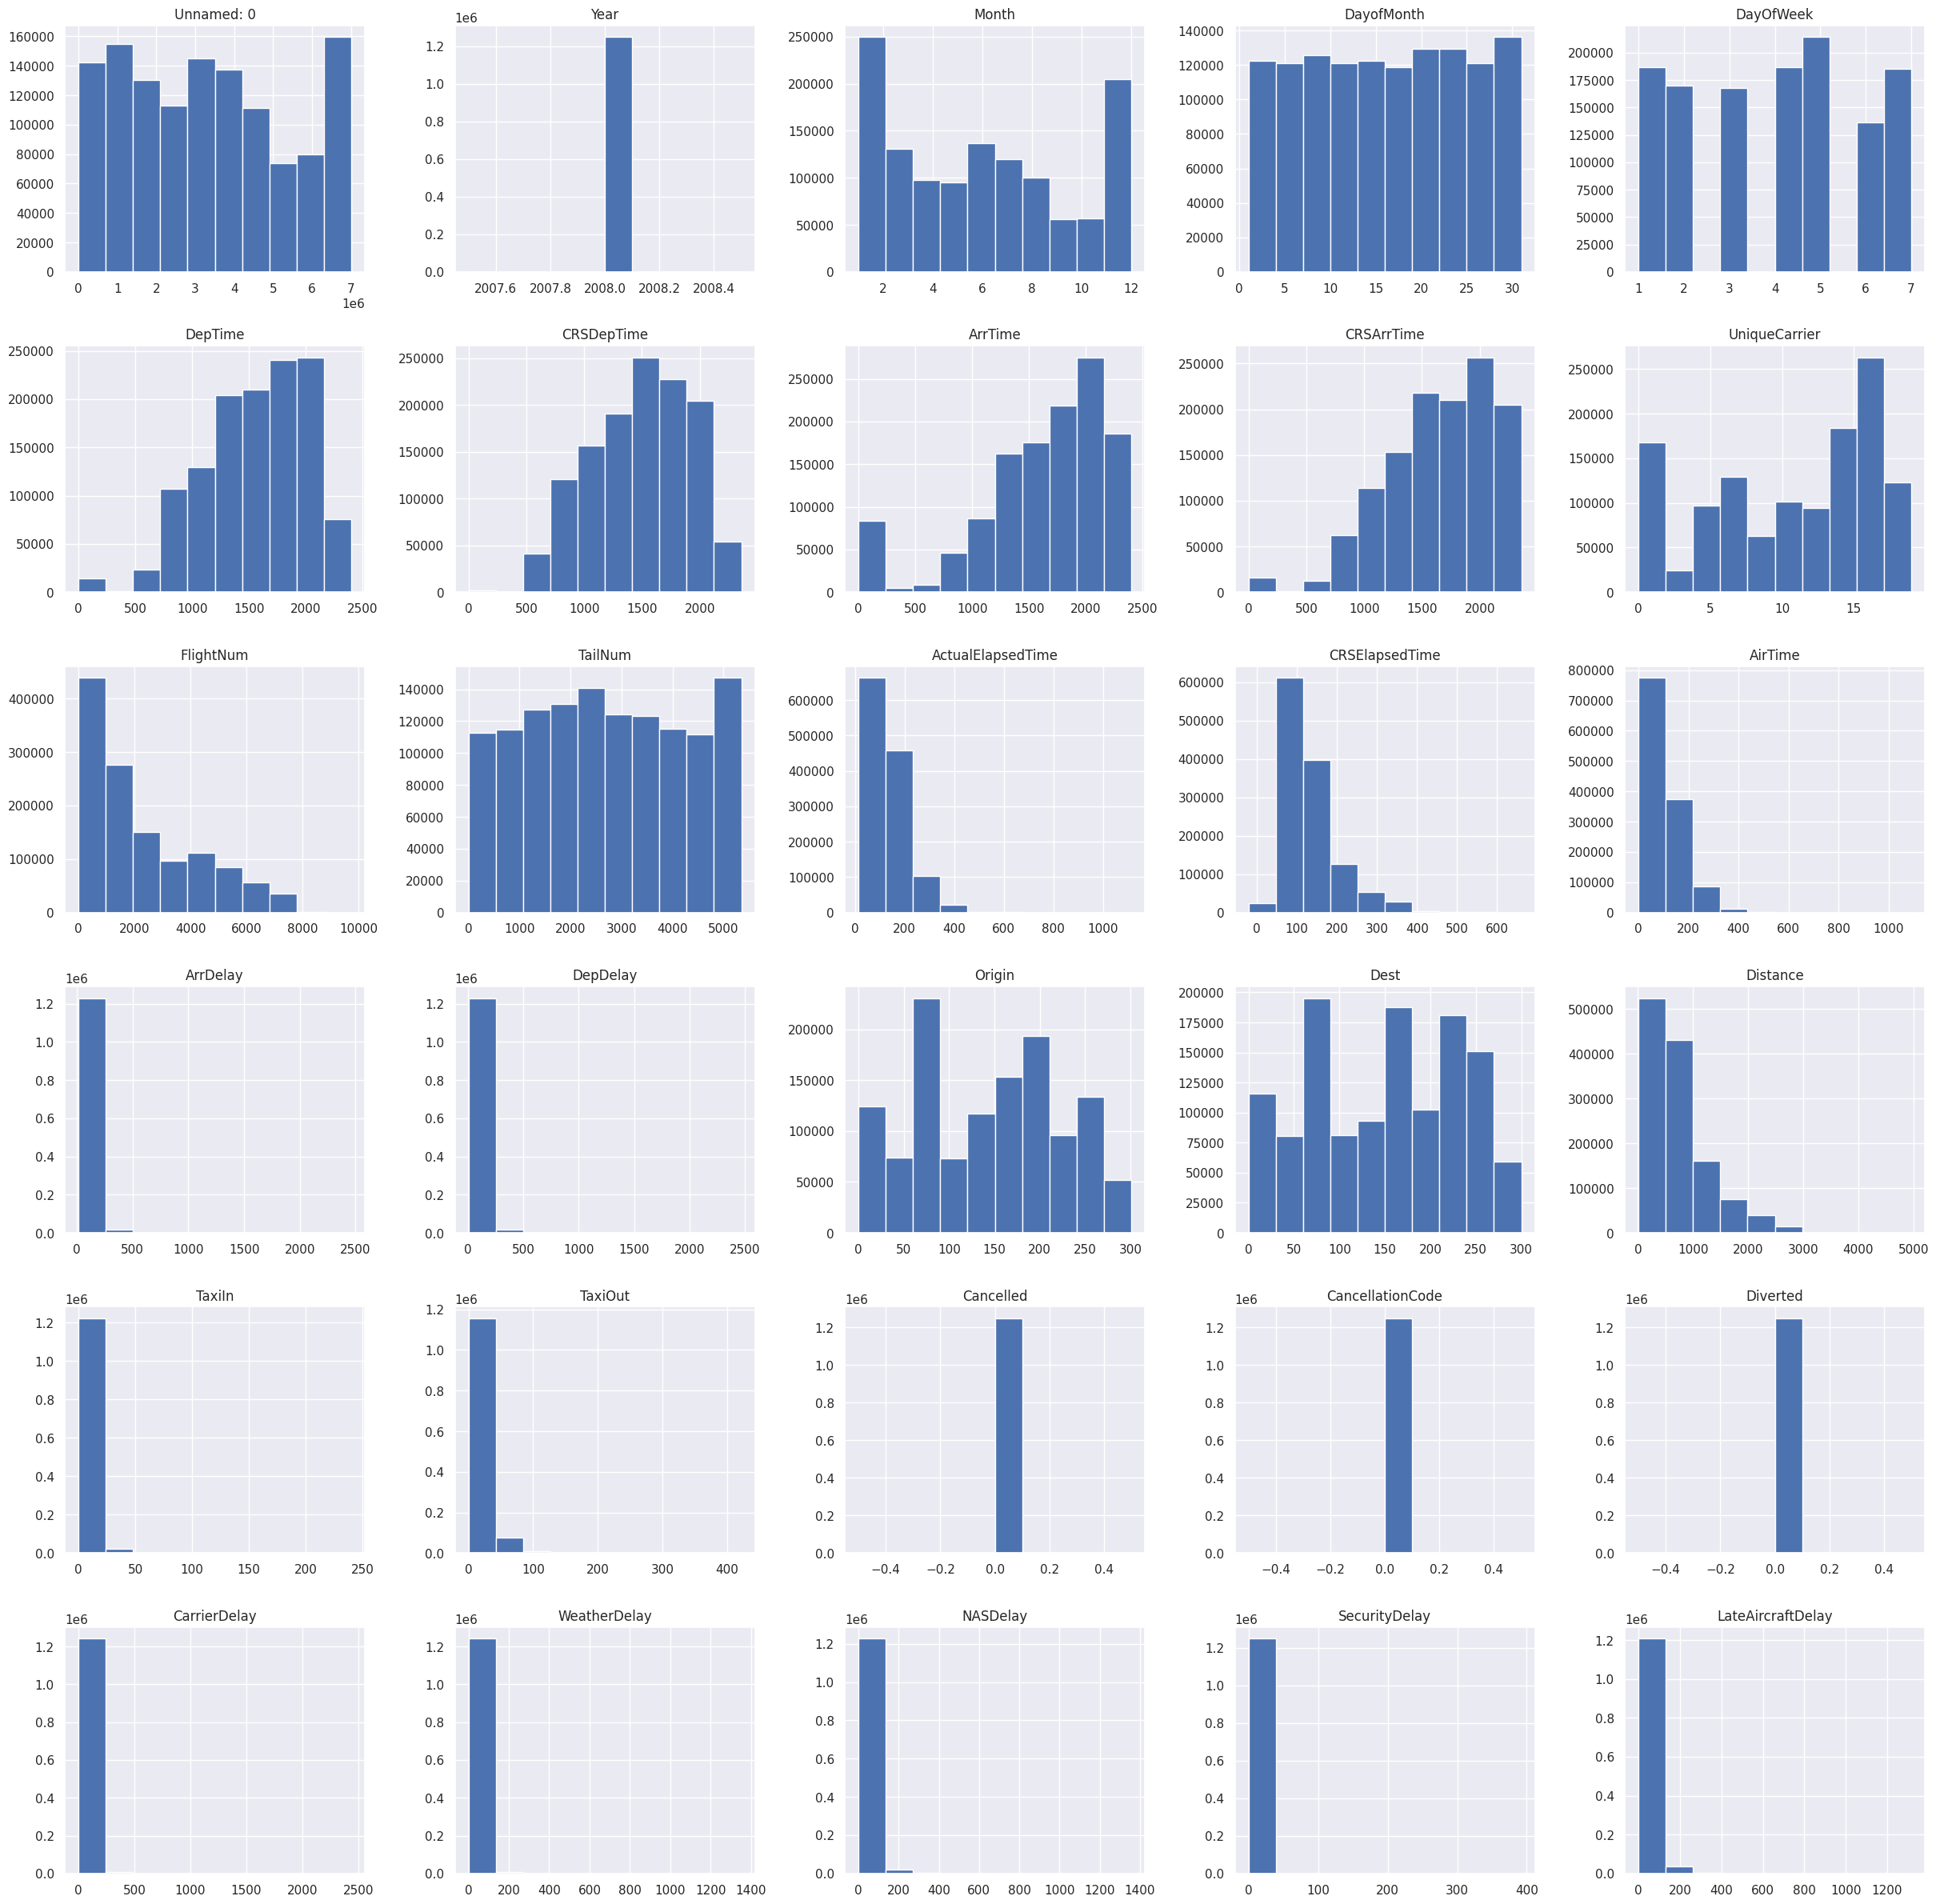

In [ ]:
import seaborn as sns

sns.set();
data1.hist(figsize=(30,30));

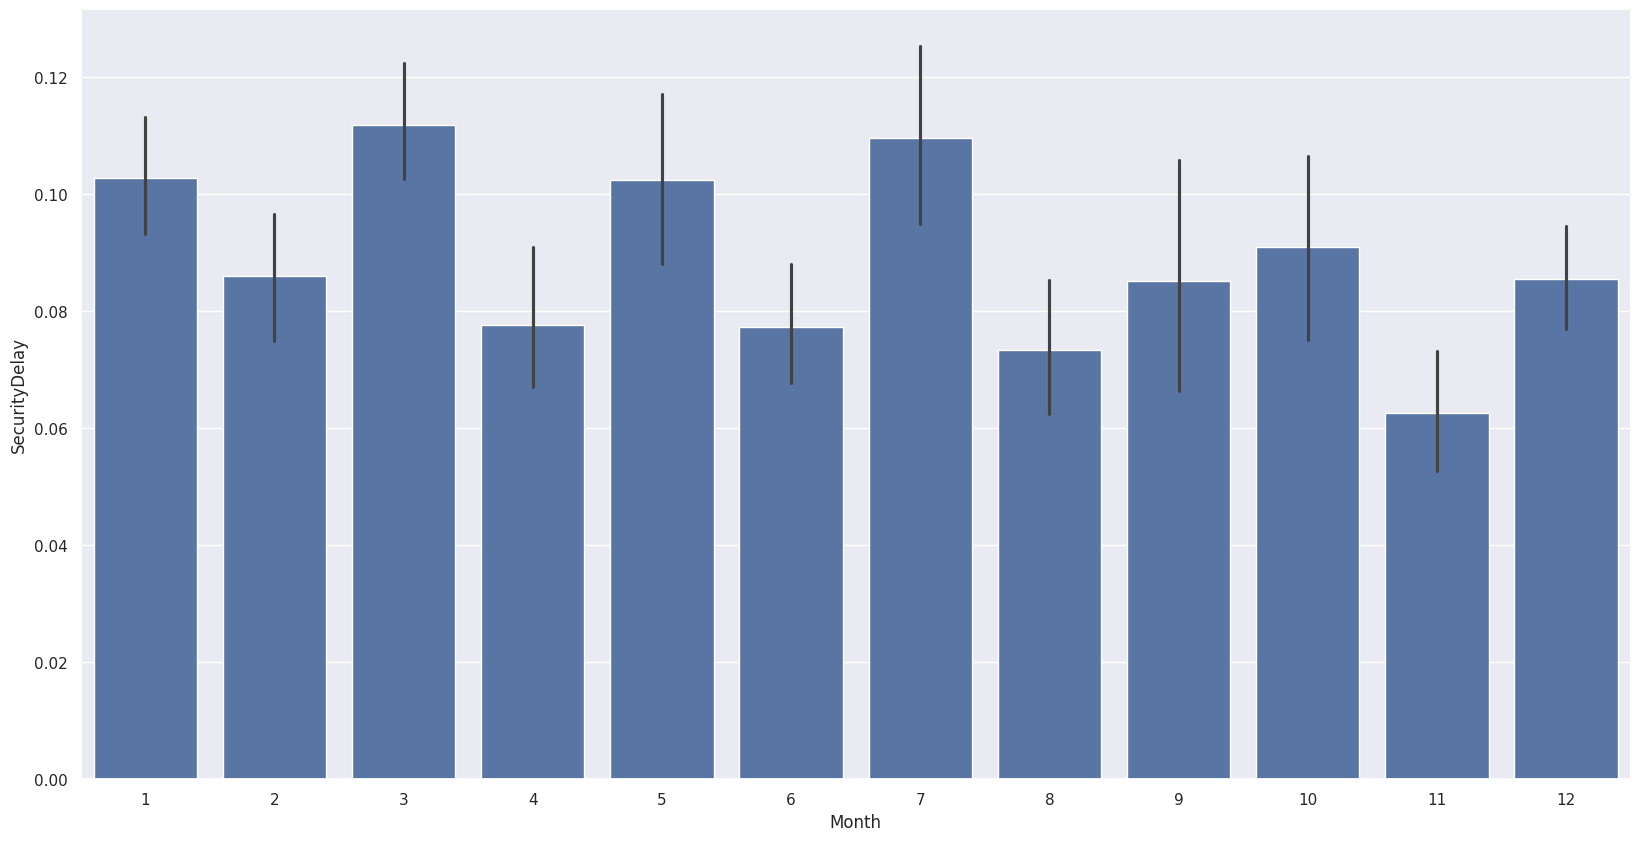

In [ ]:
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=data1, x = data1["Month"], y = data1["SecurityDelay"])
plt.show()

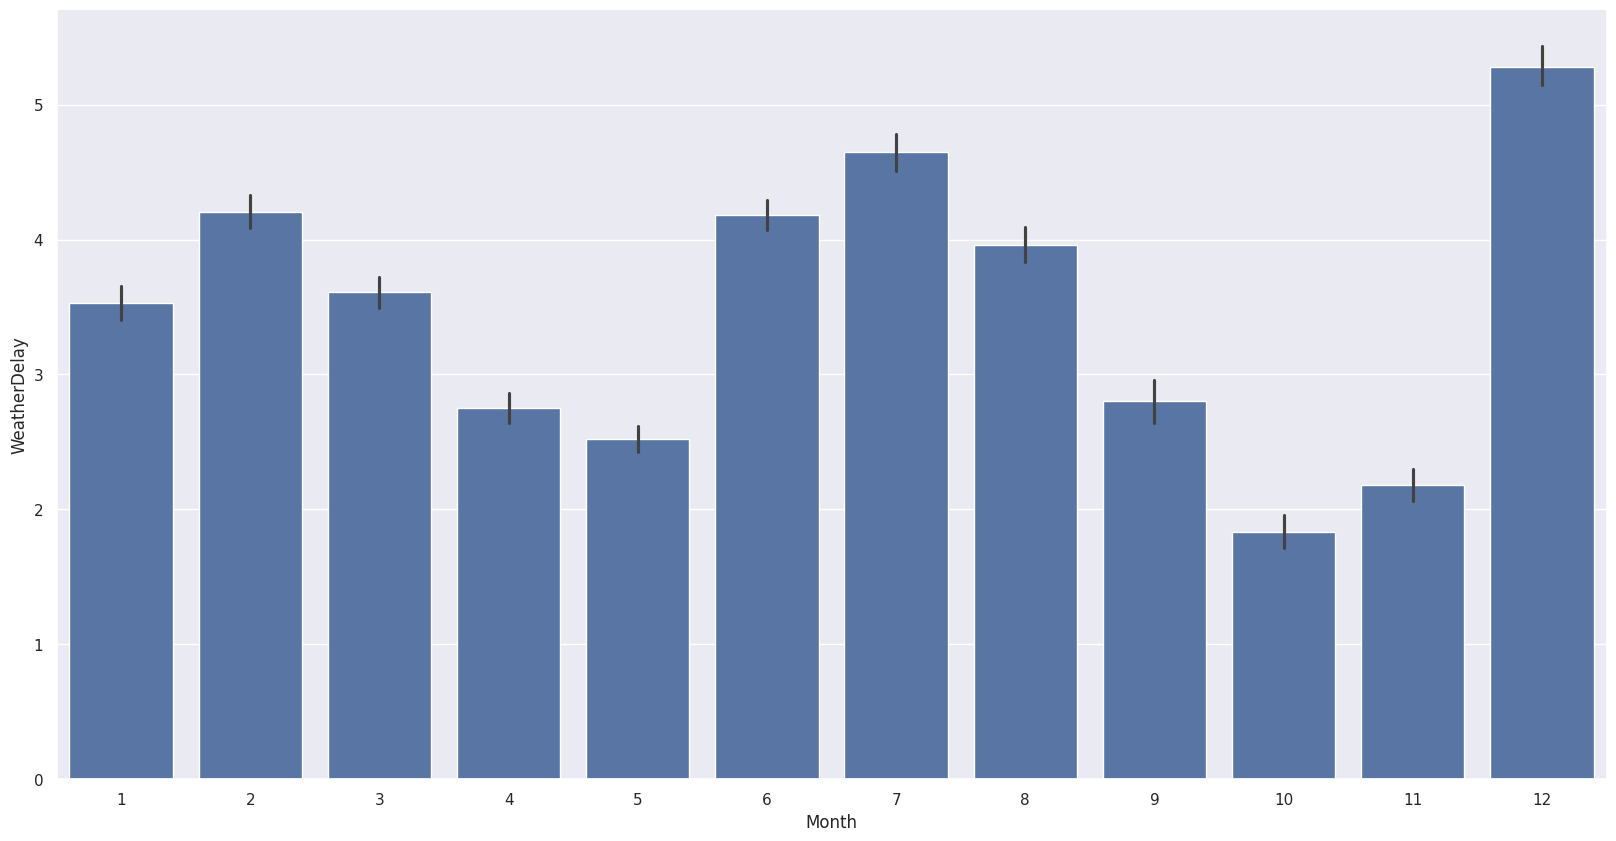

In [ ]:
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=data1, x = data1['Month'], y = data1['WeatherDelay'])
plt.show()

In [ ]:
x = data1.drop(['WeatherDelay', 'ArrDelay', 'DepDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay'], axis=1)
y = data1['LateAircraftDelay']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=44)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1247466, 24)
x_test shape is: (20, 24)
y_train shape is: (1247466,)
y_test shape is: (20,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train, )

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9980098014983516
Random Forest Regressor Test Score is :  0.9976234803206013
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [68.38811967  0.          0.          0.         36.92511216 96.33638429
  9.76456307  0.         96.33638429 15.92191646]


In [ ]:
from sklearn.metrics import mean_squared_error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  8.341174125044637


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9976234803206013

---

In [ ]:
data = data[['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode', 'TailNum']].copy()
data.head()

,UniqueCarrier,Origin,Dest,CancellationCode,TailNum
0,WN,IAD,TPA,N,N712SW
1,WN,IAD,TPA,N,N772SW
2,WN,IND,BWI,N,N428WN
3,WN,IND,BWI,N,N464WN
4,WN,IND,JAX,N,N726SW


In [ ]:
# Preprocessing

# Convert categorical variables to numerical using one-hot encoding
data_onehotencoded = pd.get_dummies(data)

# Handling missing values
data_onehotencoded.fillna(0, inplace=True)  # Fill missing values with 0

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Drop the 'Cluster' column if it exists
if 'Cluster' in data.columns:
    data.drop(columns=['Cluster'], inplace=True)
scaled_data = scaler.fit_transform(data)

# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Output the clustered dataset
print(data.head())


--------------

In [ ]:
# Preprocessing
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0'], inplace=True)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode', 'TailNum'])

# Handling missing values
data.fillna(0, inplace=True)  # Fill missing values with 0

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Drop the 'Cluster' column if it exists
if 'Cluster' in data.columns:
    data.drop(columns=['Cluster'], inplace=True)
scaled_data = scaler.fit_transform(data)

# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Output the clustered dataset
print(data.head())


---------------------

In [ ]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = data[['ActualElapsedTime','TaxiOut', 'DepDelay']]

In [ ]:
Data_DBSCAN

,ActualElapsedTime,TaxiOut,DepDelay
0,128.0,8.0,8.0
1,128.0,10.0,19.0
2,96.0,17.0,8.0
3,90.0,10.0,34.0
4,101.0,10.0,25.0
...,...,...,...
1936753,147.0,18.0,30.0
1936754,127.0,34.0,57.0
1936755,162.0,32.0,80.0
1936756,115.0,13.0,11.0


In [ ]:
Data_DBSCAN.isna().sum()

ActualElapsedTime    8387
TaxiOut               455
DepDelay                0
dtype: int64

In [ ]:
#Data_DBSCAN = Data_DBSCAN.fillna(data.mean())
Data_DBSCAN = Data_DBSCAN.dropna()
Data_DBSCAN.head()

,ActualElapsedTime,TaxiOut,DepDelay
0,128.0,8.0,8.0
1,128.0,10.0,19.0
2,96.0,17.0,8.0
3,90.0,10.0,34.0
4,101.0,10.0,25.0


In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]

NameError: name 'plt' is not defined

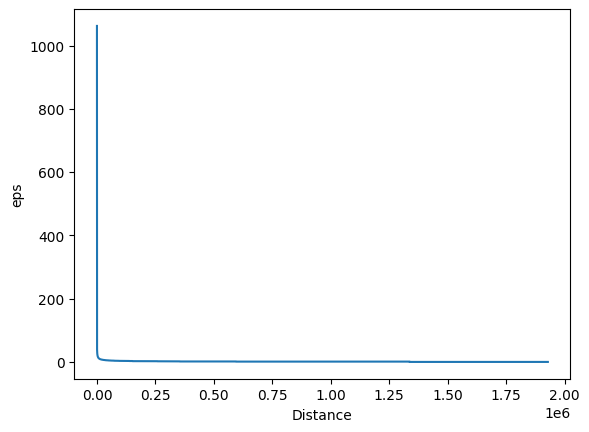

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [ ]:
#DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

In [ ]:
import seaborn as sns

#Visualize DBSCAN clustering
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')

<ipython-input-10-336db70e41e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DBSCAN['Cluster_id_DBSCAN']=results


Cluster_id_DBSCAN
-1         811024
 2960          90
 8647          86
 8874          86
 39691         84
            ...  
 96960          4
 2633           4
 60639          4
 60640          4
 121063         4
Name: count, Length: 121065, dtype: int64


-----

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


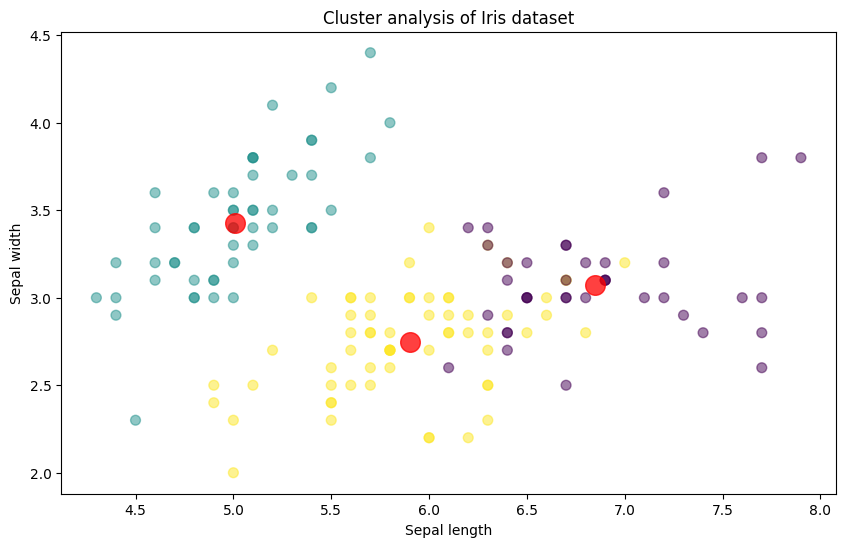

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans to the data
kmeans.fit(X)

# Getting the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting the clusters based on the first two features (you can choose any two features)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Cluster analysis of Iris dataset')
plt.show()


<ipython-input-6-dd197d72eaff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


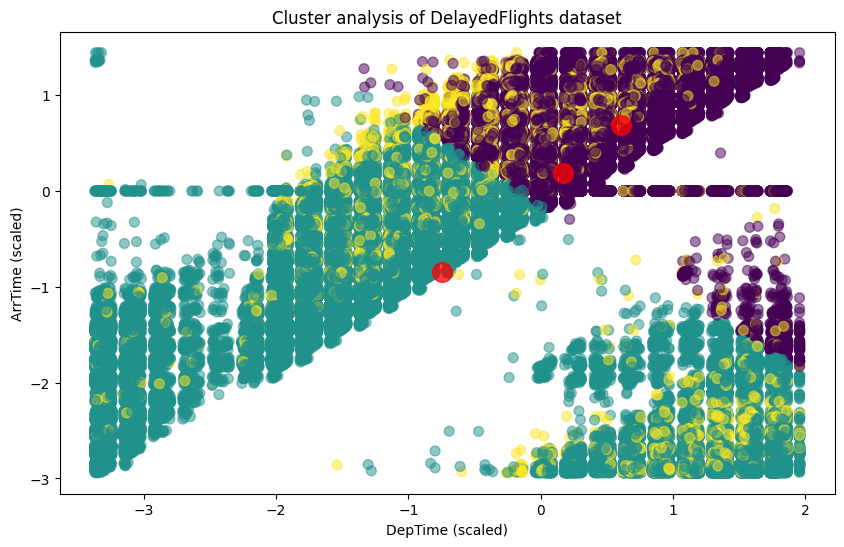

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
#data = pd.read_csv("/content/DelayedFlights.csv")
#data.head()

# Selecting relevant features for clustering
X = data[['DepTime', 'ArrTime', 'TaxiIn', 'TaxiOut']]

# Handling missing values
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans to the data
kmeans.fit(X_scaled)

# Getting the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting the clusters based on the first two features (you can choose any two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel('DepTime (scaled)')
plt.ylabel('ArrTime (scaled)')
plt.title('Cluster analysis of DelayedFlights dataset')
plt.show()
